# Analyzing Chemistry YouTube Videos

## <a id="questions"></a>Questions of interest
<ul>
    <li>Which channel has the most subscribers?</li>
    <li>Which channel has the most views?</li>
    <li>Which channel has the most videos?</li> 
    <li>Is view count correlated with subscriber count? How about with video count?</li>
    <li>For the most popular Chemistry Channel, what kinds of videos does it produce?</li>
</ul>

## Table of Contents

<ul>
    <li><a href="#questions">Questions of Interest</a></li>
    <li><a href="#wrangle1">Data Wrangling (Part I)</a></li>
    <ul>
        <li><a href="#gather1">Gather</a></li>
        <li><a href="#assess1">Assess</a></li>
        <li><a href="#clean1">Clean</a></li>
    </ul>
    <li><a href="#explore1">Explore and Visualize (Part I)</a></li>
    <li><a href="#wrangle2">Data Wrangling (Part II)</a></li>
    <ul>
        <li><a href="#gather2">Gather</a></li>
        <li><a href="#assess2">Assess</a></li>
        <li><a href="#clean2">Clean</a></li>
    </ul>
    <li><a href="#explore2">Explore and Visualize (Part II)</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

## <a id="wrangling1"></a>Data Wrangling (Part I)

### <a id="gather1"></a>Gather

In [1]:
from googleapiclient.discovery import build
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt
import matplotlib


In [2]:
import os
from googleapiclient.discovery import build
from google.auth.credentials import AnonymousCredentials

# Retrieve the API key from the environment variable
api_key = os.environ.get('GOOGLE_API_KEY') #GOOGLE_API_KEY variable MUST be set to your generated API key in your local environment (in your git repo - THAT terminal)
# Example: export GOOGLE_API_KEY=your_generated_api_key
# Can double check that the GOOGLE_API_KEY variable was set by running echo $GOOGLE_API_KEY in your terminal - it must return the actual API key for this script to work

# Set credentials to None to disable Application Default Credentials
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = ''

# Create the YouTube service using only the API key
youtube = build('youtube', 'v3', developerKey=api_key, credentials=AnonymousCredentials())


#### Function to get channel statistics

In [3]:

def get_chem_channels(api_key):

    search_request = youtube.search().list(
        q="chemistry tutorial",
        type='channel',
        part="id,snippet",
        maxResults=25
    )
    search_response = search_request.execute()

    data = []
    for item in search_response['items']:
        channel_id = item['id']['channelId']
        channel_request = youtube.channels().list(
            id=channel_id,
            part='snippet,contentDetails,statistics'
        )
        channel_response = channel_request.execute()
        data.append(channel_response['items'][0])
    
    return data


In [4]:

def get_channel_stats(channel_data):

    all_channels = []
    
    for i in range(len(channel_data)):
        data = dict(Channel_name = channel_data[i]["snippet"]["title"],
                    Channel_id = channel_data[i]["id"],
                    Videos = channel_data[i]["statistics"]["videoCount"],
                    Subscribers = channel_data[i]["statistics"]["subscriberCount"],
                    Views = channel_data[i]["statistics"]["viewCount"],
                    Playlist_id = channel_data[i]["contentDetails"]["relatedPlaylists"]["uploads"]) # this playlist_id contains all the videos posted by the channel
        all_channels.append(data)

    return all_channels

#### Gathering Data

In [5]:

channel_data = get_chem_channels(api_key)
channel_stats = get_channel_stats(channel_data)


In [6]:

# Now pass data into a dataframe

df_channel_stats = pd.DataFrame(channel_stats)

In [7]:
df_channel_stats

,Channel_name,Channel_id,Videos,Subscribers,Views,Playlist_id
0,The Organic Chemistry Tutor,UCEWpbFLzoYGPfuWUMFPSaoA,2789,7290000,1093804815,UUEWpbFLzoYGPfuWUMFPSaoA
1,Chemistry Tutorial,UCI8o8-VqPoh8aduwQHDiKng,99,33000,2240108,UUI8o8-VqPoh8aduwQHDiKng
2,Physical Chemistry (PChem),UCvtSRwUhQyx1qcedvL6vQlQ,1055,3390,573905,UUvtSRwUhQyx1qcedvL6vQlQ
3,Chemistry Tutorial,UCcVuAVhjjXu2brRWf3a-8fA,39,468,18120,UUcVuAVhjjXu2brRWf3a-8fA
4,JBTeguihanon-Eng'g & Chemistry tutorial,UCSBFOTm2XlV3mk0TB4pKLeg,363,295,24311,UUSBFOTm2XlV3mk0TB4pKLeg
5,Melissa Maribel,UC88Pezsxv3IUMAoQGP2w07w,273,344000,26918715,UU88Pezsxv3IUMAoQGP2w07w
6,College Chemistry Tutorials,UCYjJKrhk-A1Ux20o27AQcXg,231,523,52162,UUYjJKrhk-A1Ux20o27AQcXg
7,Chemistry Tutorial & Practical Lessons E.A.AN...,UCmmQoIVbqrpgDtviHsln5ZQ,120,1100,35575,UUmmQoIVbqrpgDtviHsln5ZQ
8,ALLENE CHEMISTRY TUTORIAL,UC5z870PCZduHoiLgo0VsXtQ,33,159,3359,UU5z870PCZduHoiLgo0VsXtQ
9,Chemistry Tutorial,UC8ti70eAVY6DLabtevnQ-ug,4,42,5076,UU8ti70eAVY6DLabtevnQ-ug


### <a id="assess1"></a>Assess

In [8]:
df_channel_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Channel_name  25 non-null     object
 1   Channel_id    25 non-null     object
 2   Videos        25 non-null     object
 3   Subscribers   25 non-null     object
 4   Views         25 non-null     object
 5   Playlist_id   25 non-null     object
dtypes: object(6)
memory usage: 1.3+ KB


Data is pretty clean. Only thing we'd like to fix, is changing the dtypes of Videos, Subscribers, and Views to int

### <a id="clean1"></a>Clean

#### Define:
Change datatype of Videos, Subscribers, and Views columns from object to integer

#### Code:

In [9]:
df_channel_stats['Videos'] = df_channel_stats['Videos'].astype('int64')
df_channel_stats['Subscribers'] = df_channel_stats['Subscribers'].astype('int64')
df_channel_stats['Views'] = df_channel_stats['Views'].astype('int64')


#### Check:

In [10]:
df_channel_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Channel_name  25 non-null     object
 1   Channel_id    25 non-null     object
 2   Videos        25 non-null     int64 
 3   Subscribers   25 non-null     int64 
 4   Views         25 non-null     int64 
 5   Playlist_id   25 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.3+ KB



Now that the data is clean, we can explore and visualize.

## <a id="explore1"></a>Explore and Visualize (I)

Who has the most subscribers?

In [11]:

df_channel_stats['Subscribers'].describe()

count    2.500000e+01
mean     3.177434e+05
std      1.454312e+06
min      3.000000e+00
25%      4.200000e+01
50%      4.680000e+02
75%      3.300000e+04
max      7.290000e+06
Name: Subscribers, dtype: float64

There's a vast range between the account with the greatest number of subscribers (7 million) and the least (3).

Thus, let's just look at only those accounts with subscribers greater than 10,000

In [12]:
df_top_subscribers = df_channel_stats[df_channel_stats['Subscribers'] > 10000]
df_top_subscribers = df_top_subscribers.sort_values(by='Subscribers', ascending=False).reset_index(drop=True)
df_top_subscribers

,Channel_name,Channel_id,Videos,Subscribers,Views,Playlist_id
0,The Organic Chemistry Tutor,UCEWpbFLzoYGPfuWUMFPSaoA,2789,7290000,1093804815,UUEWpbFLzoYGPfuWUMFPSaoA
1,Melissa Maribel,UC88Pezsxv3IUMAoQGP2w07w,273,344000,26918715,UU88Pezsxv3IUMAoQGP2w07w
2,TAHSIN TUTORIAL,UCFQor13u_zst4lXXRPdvXlw,520,113000,8135432,UUFQor13u_zst4lXXRPdvXlw
3,TOMAR CHEMISTRY TUTORIAL,UCF4Bwajbfhxle6I_1UOKIlg,668,59800,7920508,UUF4Bwajbfhxle6I_1UOKIlg
4,The Glaser Tutoring Company,UC2C34WdYMOm47PkWovvzLpw,5409,55600,12902848,UU2C34WdYMOm47PkWovvzLpw
5,Sanjay Chem Tutorials,UCSziY-LawQZiiyXG2ef62ww,676,40300,4915073,UUSziY-LawQZiiyXG2ef62ww
6,Chemistry Tutorial,UCI8o8-VqPoh8aduwQHDiKng,99,33000,2240108,UUI8o8-VqPoh8aduwQHDiKng


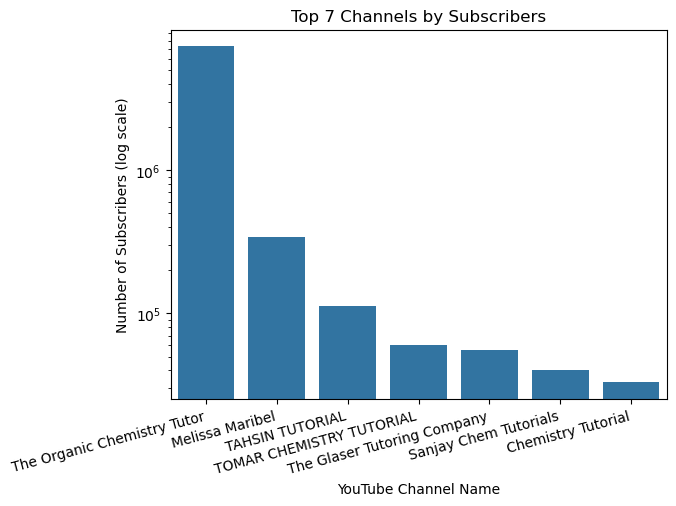

In [13]:
# The topmost channel has many more subscirbers than the others.  So makes most sense to use an axis transformation (logarithmic scale)
# if we want to keep this topmost channel in the graph

sb.barplot(data=df_top_subscribers, x='Channel_name', y='Subscribers');
plt.yscale('log')  # Set y-axis to logarithmic scale

plt.xticks(rotation=15, ha='right');
plt.xlabel('YouTube Channel Name');
plt.ylabel('Number of Subscribers (log scale)');
plt.title('Top 7 Channels by Subscribers');


The Organic Chemistry Tutor has the most subscribers by a long shot, at about 7.27 million.

Which channel has the most views?

In [14]:
df_channel_stats['Views'].describe()

count    2.500000e+01
mean     4.630453e+07
std      2.183132e+08
min      2.400000e+01
25%      1.951000e+03
50%      1.812000e+04
75%      2.240108e+06
max      1.093805e+09
Name: Views, dtype: float64

In [15]:
df_top_views = df_channel_stats[df_channel_stats['Views'] > 1000000]
df_top_views = df_top_views.sort_values(by='Views', ascending=False).reset_index(drop=True)
df_top_views

,Channel_name,Channel_id,Videos,Subscribers,Views,Playlist_id
0,The Organic Chemistry Tutor,UCEWpbFLzoYGPfuWUMFPSaoA,2789,7290000,1093804815,UUEWpbFLzoYGPfuWUMFPSaoA
1,Melissa Maribel,UC88Pezsxv3IUMAoQGP2w07w,273,344000,26918715,UU88Pezsxv3IUMAoQGP2w07w
2,The Glaser Tutoring Company,UC2C34WdYMOm47PkWovvzLpw,5409,55600,12902848,UU2C34WdYMOm47PkWovvzLpw
3,TAHSIN TUTORIAL,UCFQor13u_zst4lXXRPdvXlw,520,113000,8135432,UUFQor13u_zst4lXXRPdvXlw
4,TOMAR CHEMISTRY TUTORIAL,UCF4Bwajbfhxle6I_1UOKIlg,668,59800,7920508,UUF4Bwajbfhxle6I_1UOKIlg
5,Sanjay Chem Tutorials,UCSziY-LawQZiiyXG2ef62ww,676,40300,4915073,UUSziY-LawQZiiyXG2ef62ww
6,Chemistry Tutorial,UCI8o8-VqPoh8aduwQHDiKng,99,33000,2240108,UUI8o8-VqPoh8aduwQHDiKng


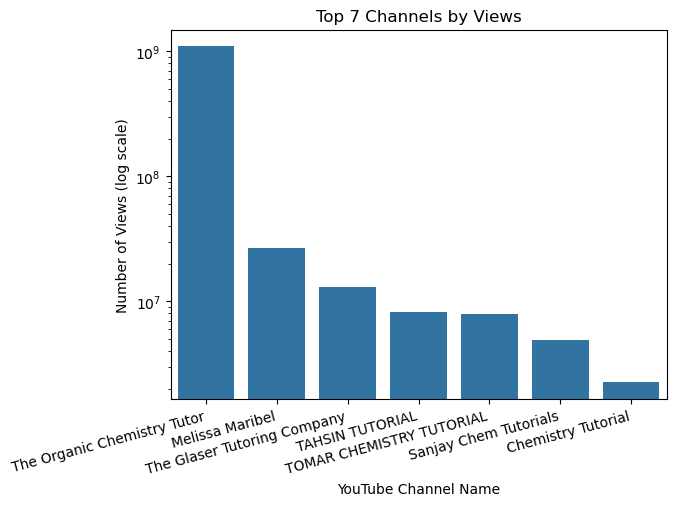

In [16]:
sb.barplot(data=df_top_views, x='Channel_name', y='Views');
plt.yscale('log');

plt.xticks(rotation=15, ha='right');
plt.xlabel('YouTube Channel Name');
plt.ylabel('Number of Views (log scale)');
plt.title('Top 7 Channels by Views');

Interesting! 

The same 7 YouTube Channels have the most subscribers and the most views, although their orders vary slightly.
<ul>
    <li>The Organic Chemistry Tutor comes out on top by far, with both views and subscribers.</li>
    <li>Melissa Maribel is a ways behind the Orgo Chem Tutor, but 2nd from the top for both views and subscribers.</li>
    <li>The Glaser Tutoring Company has fewer subscribers than Tahsin Tutorial and Tomar Chemistry Tutorial, BUT Glaser has MORE VIEWS than them both.</li>
    <li>Chemistry Tutorial channel is consistently at the bottom of the top 7, for both views and subscribers.</li>
</ul>

Another takeaway might be that subscribers and views tend to be correlated - the more subscribers, the more views.  The exception to this trend is Glaser Tutoring Company, which has more views than TAHSIN and TOMAR tutorial channels, despite having fewer subscribers.

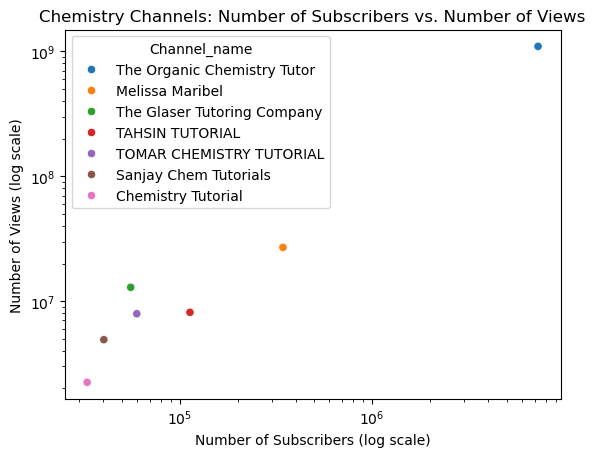

In [17]:
sb.scatterplot(data=df_top_views, x='Subscribers', y='Views', hue='Channel_name');
plt.xscale('log');
plt.yscale('log');

plt.xlabel('Number of Subscribers (log scale)');
plt.ylabel('Number of Views (log scale)');
plt.title('Chemistry Channels: Number of Subscribers vs. Number of Views');

In [18]:
correl_coeff = np.corrcoef(df_top_views['Subscribers'], df_top_views['Views'])[0, 1]
correl_coeff


0.9997338336524069

Subscribers and Views seems to be highly correlated, with a correlation coefficient of 0.9997.

Of course, to see if this correlation is significant, we would need to perform statistical testing.

Which channel has the most videos?

In [19]:
df_most_videos = df_channel_stats[df_channel_stats['Videos'] > 500]
df_most_videos = df_most_videos.sort_values(by='Videos', ascending=False).reset_index(drop=True)
df_most_videos

,Channel_name,Channel_id,Videos,Subscribers,Views,Playlist_id
0,The Glaser Tutoring Company,UC2C34WdYMOm47PkWovvzLpw,5409,55600,12902848,UU2C34WdYMOm47PkWovvzLpw
1,The Organic Chemistry Tutor,UCEWpbFLzoYGPfuWUMFPSaoA,2789,7290000,1093804815,UUEWpbFLzoYGPfuWUMFPSaoA
2,Physical Chemistry (PChem),UCvtSRwUhQyx1qcedvL6vQlQ,1055,3390,573905,UUvtSRwUhQyx1qcedvL6vQlQ
3,Sanjay Chem Tutorials,UCSziY-LawQZiiyXG2ef62ww,676,40300,4915073,UUSziY-LawQZiiyXG2ef62ww
4,TOMAR CHEMISTRY TUTORIAL,UCF4Bwajbfhxle6I_1UOKIlg,668,59800,7920508,UUF4Bwajbfhxle6I_1UOKIlg
5,TAHSIN TUTORIAL,UCFQor13u_zst4lXXRPdvXlw,520,113000,8135432,UUFQor13u_zst4lXXRPdvXlw


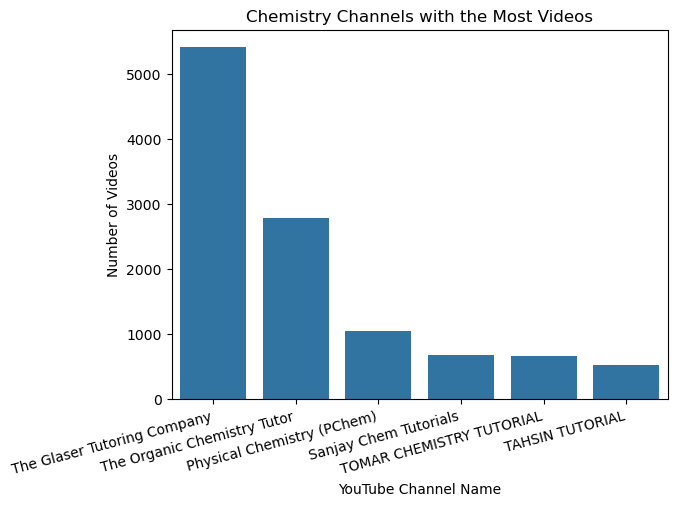

In [20]:
sb.barplot(data=df_most_videos, x='Channel_name', y='Videos');
plt.xticks(rotation=15, ha='right');

plt.xlabel('YouTube Channel Name');
plt.ylabel('Number of Videos');
plt.title('Chemistry Channels with the Most Videos');

Interesting!

It seems that video count is NOT correlated with view and subscriber count.  That is, the quantity of videos may not impact whether or not a channel does well, but rather the QUALITY of videos.  Some notable observations to support this thought:
<ul>
    <li>The Organic Chemistry Tutor has about half as many videos as The Glaser Tutoring Company, yet has about 85x MORE VIEWS and 130x MORE SUBSCRIBERS.</li>
    <li>Melissa Maribel doesn't even make the top 6 channels with the most VIDEOS (she has only 268 videos), BUT she has MORE VIEWS and MORE SUBSCRIBERS than all the channels who have 500 - 1000 videos. Good for her.</li>
    <li>Physical Chemistry (PChem) has over 1000 videos - which is 3rd for channels with the most videos - but doesn't make the top 7 for MOST VIEWS or MOST SUBSCRIBERS.</li>
</ul>

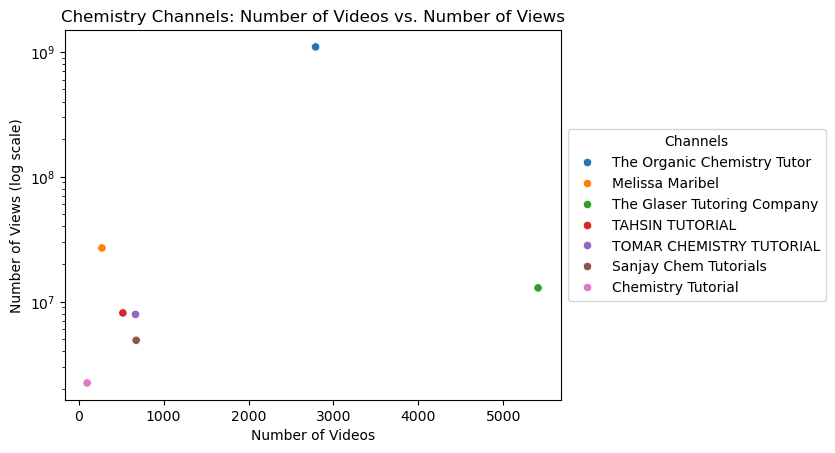

In [21]:
sb.scatterplot(data=df_top_views, x='Videos', y='Views', hue='Channel_name');
plt.yscale('log');

plt.xlabel('Number of Videos');
plt.ylabel('Number of Views (log scale)');
plt.title('Chemistry Channels: Number of Videos vs. Number of Views');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Channels');

In [22]:
correl_coeff = np.corrcoef(df_top_views['Videos'], df_top_views['Views'])[0, 1]
correl_coeff


0.29610490243218274

By looking at the correlation coefficient (0.2955), it seems that number of videos and views are weakly correlated.

Of course, we would need to perform statistical testing to confirm whether this is a significant correlation or caused by chance.

Another good metric to assess would be date that the channel started.

Do those channels that have been around longer = have more views and subscribers?

## <a id="wrangling2"></a>Data Wrangling (Part II)

Now that we've analyzed the top Chemistry Channels, let's look at the types of videos posted by the most popular channel - The Organic Chemistry Tutor

### <a id="gather2"></a>Gather

#### Function to get video ids

In [23]:
top_channel_playlist_id = df_top_views.iloc[0].loc['Playlist_id']
top_channel_playlist_id

'UUEWpbFLzoYGPfuWUMFPSaoA'

In [24]:
def get_video_ids(api_key, playlist_id):
    
    request = youtube.playlistItems().list(
        part="contentDetails",
        playlistId = playlist_id,
        maxResults = 50
    )
    videos_response = request.execute()

    # Filter for the videos based on "chemistry" being in the video description
    # Reason being - a quick look at The Organic Chemistry Tutor's videos shows that he posts physics and math specific videos as well 
    # we just want to see the video details for the chemistry related videos

    video_ids = []
    for i in range(len(videos_response["items"])):
         video_ids.append(videos_response["items"][i]["contentDetails"]["videoId"])

    next_page_token = videos_response.get('nextPageToken')
    
    while next_page_token is not None:
        video_request = youtube.playlistItems().list(
            part="contentDetails",
            playlistId = playlist_id,
            maxResults = 50,
            pageToken = next_page_token
        )
        videos_response = video_request.execute()

        for i in range(len(videos_response["items"])):
            video_ids.append(videos_response["items"][i]["contentDetails"]["videoId"])

        next_page_token = videos_response.get('nextPageToken')

    return video_ids

In [25]:
video_ids = get_video_ids(api_key, top_channel_playlist_id)


In [26]:
video_ids, len(video_ids)

(['ejEUnxyaFcU',
  'wgygbIljbwI',
  '2qYL_m7UeJc',
  'BBzP196v4vM',
  'tX-Y0BRaXK4',
  'BpS6mO4V2wc',
  'rPVvvDNn_Uw',
  'kBSj35rik8w',
  'jd3dmr6cVf8',
  'AL6hU7nBzY0',
  'MEvXlHm_Caw',
  '4V3VpwiwOKs',
  'JH0MsP_48ic',
  'fyJAOD3X5tw',
  'uX8KkBI3RuM',
  '5wIiOFnXSYs',
  'JnuFCXYhuz4',
  'rb2nU7YZV_I',
  'yp0c-NKGg5g',
  'UjTTx2eYrx8',
  'Zs7N7W8VvbI',
  'vEUs1Heu8bo',
  'pi4SvKZsNrg',
  'FYKoU0sb9ks',
  'AtbaYUYTawg',
  'gK1XvjhwxhQ',
  'e2QxsIyPjVI',
  'FP6qS5d3Ly4',
  'K4heM9mSrw0',
  'l8KrAo089_U',
  '6G6i8vSa8Zs',
  'IawY86XveQE',
  '3gcCKvKzAW0',
  'FyALsC4IX9Y',
  'W2g2iP83JoI',
  'DFNTKiOB7t0',
  'ecMYbfbTE-w',
  'S23AOeGP_Os',
  'j8Rf6hXXmUQ',
  'MR8jQZLcHKM',
  'WSP07nOjDvo',
  'E8C06X-v0_A',
  'da0T6iWA0us',
  'x5mJRp8f6Ok',
  'p9938IIEhXU',
  'vQerALNpNfo',
  'bddckR734aM',
  'cu_YZFINPN0',
  'SBSnSnThgDE',
  'ieoz7YMb330',
  '63rtI9XqUps',
  'I9tWTx9xcuc',
  'ihkYZOwPetM',
  'hNsvGz7JPJQ',
  'xb5mkRDDMH0',
  'DyfGzKOwtYU',
  '6yzaEpacZkg',
  'dsqD5zg9hLY',
  'ZbBHnod_Mew

#### Function to get video details

In [27]:
def get_video_details(api_key, video_ids):

    chem_video_stats = []

    for i in range(0, len(video_ids), 50): 
        video_request = youtube.videos().list(
            part="snippet,statistics",
            id = ','.join(video_ids[i:i+50])
        )
        video_response = video_request.execute()

        # Filter videos based on the word "chemistry" in the description
        
        for video in video_response["items"]:
            description = video['snippet']['description'].lower()
            
            if ('chemistry' in description) and ('\n\n' in description):
                
                if description.index("chemistry") < description.index("\n\n"):
                    video_stats = dict(Title = video["snippet"]["title"],
                                       Date = video["snippet"]["publishedAt"],
                                       View_Count = video["statistics"]["viewCount"],
                                       Like_Count = video["statistics"]["likeCount"],
                                       Comment_Count = video["statistics"]["commentCount"]
                                      )
                           
                    chem_video_stats.append(video_stats)  # this list stores dictionaries of info for all chemistry-related videos from this channel 


    return chem_video_stats
        

In [28]:
video_details = get_video_details(api_key, video_ids)
video_data = pd.DataFrame(video_details)
video_data

,Title,Date,View_Count,Like_Count,Comment_Count
0,How To Find The Missing Value Given The Mean -...,2023-10-13T12:00:41Z,28385,296,29
1,Stoichiometry Formulas and Equations - College...,2023-10-09T12:00:11Z,18724,494,29
2,Gas Law Formulas and Equations - College Chemi...,2023-10-08T10:53:17Z,32031,698,49
3,Intensive and Extensive Properties of Matter -...,2023-09-30T12:00:27Z,14356,413,18
4,"Atomicity - Monoatomic, Diatomic, Triatomic, ...",2023-09-22T12:00:24Z,11468,256,15
...,...,...,...,...,...
585,Hydroboration Oxidation Mechanism of Alkenes -...,2016-04-16T11:23:58Z,142375,1349,53
586,Organic Chemistry 2 Final Exam Review,2016-04-09T08:47:55Z,175574,2207,80
587,IR Infrared Spectroscopy Review - 15 Practice ...,2016-03-29T02:27:08Z,565679,8216,281
588,How To Calculate Theoretical Yield and Percent...,2015-04-26T00:48:25Z,3048331,25684,1071


### <a id="assess2"></a>Assess

In [29]:
video_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          590 non-null    object
 1   Date           590 non-null    object
 2   View_Count     590 non-null    object
 3   Like_Count     590 non-null    object
 4   Comment_Count  590 non-null    object
dtypes: object(5)
memory usage: 23.2+ KB


There is no missing or duplicate data. 

There are however some datatypes that need correcting:
<ul>
   <li>Date data needs to be in datetime format.</li>
   <li>View_Count, Like_Count, and Comment_Count need to be integer datatype.</li>
</ul>

### <a id="clean2"></a>Clean

In [30]:
video_data['Date'] = pd.to_datetime(video_data['Date'])
video_data['Date'] = video_data['Date'].dt.date # Truncate to date (remove the time part)
video_data['Date'] = pd.to_datetime(video_data['Date'])

video_data['View_Count'] = video_data['View_Count'].astype('int64')
video_data['Like_Count'] = video_data['Like_Count'].astype('int64')
video_data['Comment_Count'] = video_data['Comment_Count'].astype('int64')

video_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Title          590 non-null    object        
 1   Date           590 non-null    datetime64[ns]
 2   View_Count     590 non-null    int64         
 3   Like_Count     590 non-null    int64         
 4   Comment_Count  590 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 23.2+ KB


In [31]:
video_data = video_data.sort_values(by=['View_Count'], ascending=False)
video_data

,Title,Date,View_Count,Like_Count,Comment_Count
535,"Intro to Chemistry, Basic Concepts - Periodic ...",2016-08-30,4226649,58344,1804
457,"Stoichiometry Basic Introduction, Mole to Mole...",2017-08-11,3166593,45579,1470
452,Empirical Formula & Molecular Formula Determin...,2017-08-12,3147912,43112,1585
403,Electron Configuration - Basic introduction,2017-09-26,3136176,53576,2213
588,How To Calculate Theoretical Yield and Percent...,2015-04-26,3048331,25684,1071
...,...,...,...,...,...
22,Unusual SN1 Reaction Mechanism,2023-03-24,6997,121,21
29,Concerted Reaction Mechanism - SN2 and E2,2023-03-12,6872,100,8
12,SN2 Reaction Mechanism - Double Inversion,2023-04-10,6505,104,13
25,Effect of Temperature on Elimination and Subst...,2023-03-18,6358,125,15


## <a id="explore2"></a>Explore and Visualize (II)

How many views do the top 20 videos have? From the Organic Chemistry Tutor Channel

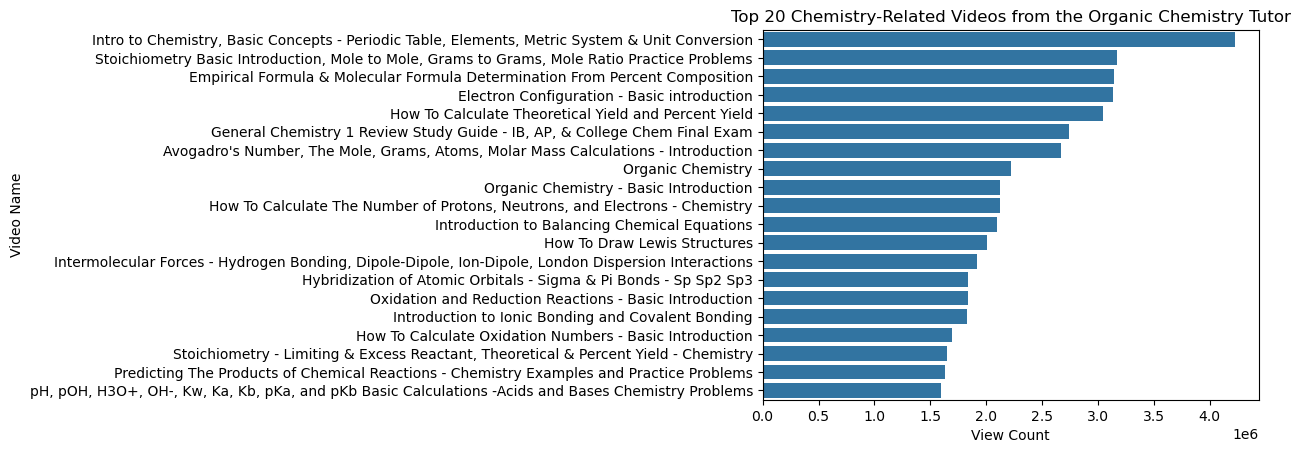

In [32]:
top20_videos = video_data.head(20)

sb.barplot(data=top20_videos, y='Title', x='View_Count');

plt.xlabel('View Count');
plt.ylabel('Video Name');
plt.title('Top 20 Chemistry-Related Videos from the Organic Chemistry Tutor');

We can see that the Organic Chemistry Tutor's TOP video has about 1 million more views that the its second most popular video.  This video could have taken off because it goes over basic concepts in chemistry that lay the foundation for chemistry.

After that, the most popular videos seem to be <strong>tutorials</strong> on the following topics:
<ul>
    <li>Stoichiometry and Molar Calculations</li>
    <li>Determining Empirical and Molecular Formulas</li>
    <li>Electron Configurations</li>
    <li>Calculating Theoretical Yield and Percent Yield</li>
    <li>Predicting products of Chemical Reactions & Balancing subsequent Chemical Equations</li>
    <li>Drawing Lewis Structures</li>
    <li>Bonding: Ionic, Covalent, and Intermolecular Forces</li>
    <li>Reduction-Oxidation Reactions</li>
    <li>Basic Acid-Base Reaction Calculations</li>
</ul>

If I were to start my own channel, it would be wise to create tutorial videos on similiar foundational topics.  This was my suspicion, but good to see.



Let's see if his most popular videos have been around for longer (i.e. they had more time to get popular).

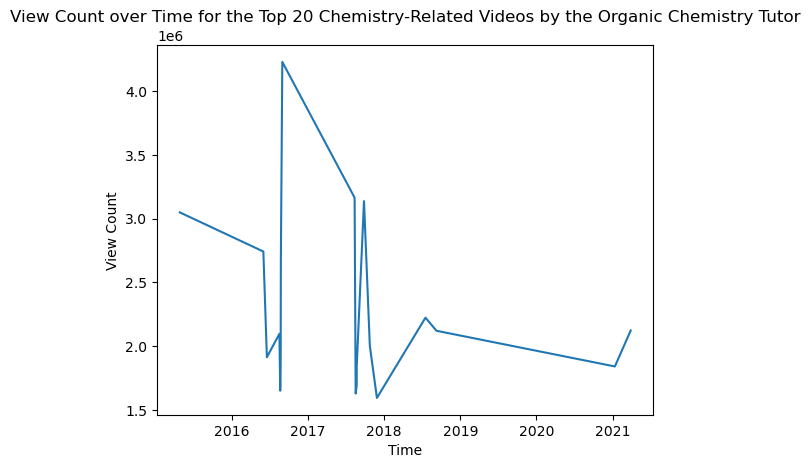

In [33]:
top_videos_bytime = top20_videos.sort_values(by=['Date'], ascending=True)

plt.errorbar(data=top_videos_bytime, x='Date', y='View_Count');

plt.xlabel('Time');
plt.ylabel('View Count');
plt.title('View Count over Time for the Top 20 Chemistry-Related Videos by the Organic Chemistry Tutor');

Seems like his best 4 videos all occurred before 2018.  Not to say his view count isn't incredibly impressive from 2018 - 2021 anyway.

Let's take a peak of in general, the view count of his videos over time.

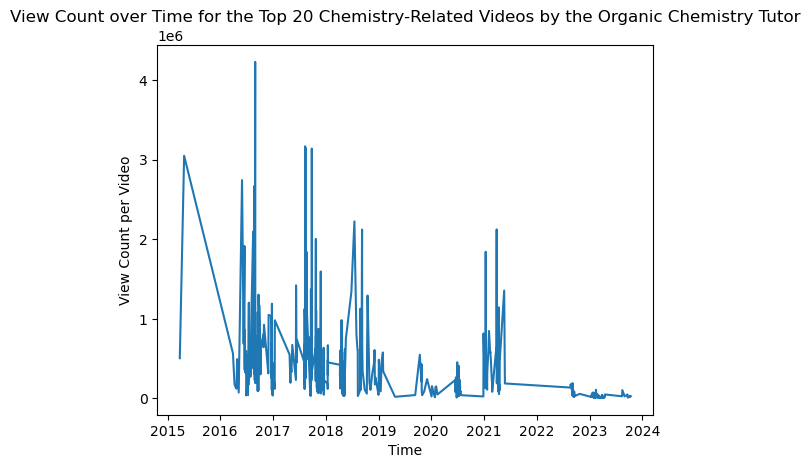

In [34]:
all_videos_bytime = video_data.sort_values(by=['Date'], ascending=True)

plt.errorbar(data=all_videos_bytime, x='Date', y='View_Count');

plt.xlabel('Time');
plt.ylabel('View Count per Video');
plt.title('View Count over Time for the Top 20 Chemistry-Related Videos by the Organic Chemistry Tutor');

Interesting!

It seems like his videos' popularity take a cyclical pattern, where each year there are videos with peak popularity (anywhere from 2-4 million views) before levelling out again to views around 0.5-1 million (to date). 

This pattern appears consistent from 2016 to 2018.  After 2019, any new videos published till 2021 have less than 1 million views each.  Video views peak again for those published in 2021 (1.5-2 million), but then any videos published after that (2022-2024) have had consistently lower views (thousands).

Perhaps the Organic Chemistry Tutor's skyrocketing views had to do with the COVID-19 pandemic: any videos published before 2020 may have had a greater opportunity to skyrocket because there was a greater need for them in 2020 and 2021.

The resurgance of new videos with views over a million happens again in 2021; I wonder if that's still COVID-19 related. Or perhaps it's the content he was putting out in 2021 - perhaps it was better than what he put out in 2020.

I digress - Let's take a look at how many videos he posts per year.

In [35]:
video_data.head()

,Title,Date,View_Count,Like_Count,Comment_Count
535,"Intro to Chemistry, Basic Concepts - Periodic ...",2016-08-30,4226649,58344,1804
457,"Stoichiometry Basic Introduction, Mole to Mole...",2017-08-11,3166593,45579,1470
452,Empirical Formula & Molecular Formula Determin...,2017-08-12,3147912,43112,1585
403,Electron Configuration - Basic introduction,2017-09-26,3136176,53576,2213
588,How To Calculate Theoretical Yield and Percent...,2015-04-26,3048331,25684,1071


In [36]:
video_data['Year'] = video_data['Date'].dt.year
video_data.head()

,Title,Date,View_Count,Like_Count,Comment_Count,Year
535,"Intro to Chemistry, Basic Concepts - Periodic ...",2016-08-30,4226649,58344,1804,2016
457,"Stoichiometry Basic Introduction, Mole to Mole...",2017-08-11,3166593,45579,1470,2017
452,Empirical Formula & Molecular Formula Determin...,2017-08-12,3147912,43112,1585,2017
403,Electron Configuration - Basic introduction,2017-09-26,3136176,53576,2213,2017
588,How To Calculate Theoretical Yield and Percent...,2015-04-26,3048331,25684,1071,2015


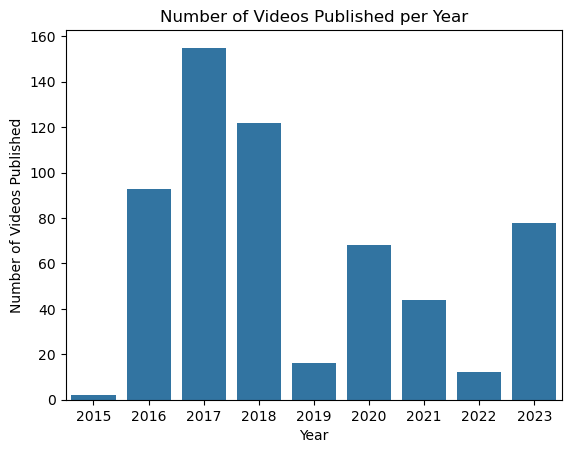

In [37]:
sb.countplot(data = video_data, x='Year');

plt.xlabel('Year');
plt.ylabel('Number of Videos Published');
plt.title('Number of Videos Published per Year');


Interesting! 

So he still posted quite a few new videos in 2023 (~80), but not many in 2022 (<20).  His most active years for content creation were from 2016 to 2018, where he was posting 90-160 videos / year.

I wonder if he felt encouraged to start creating more videos again in 2020, because he saw how much his videos published between 2016-2018 took off during the pandemic. 
Perhaps he was less interested in continuing his channel after 2018, but the incentive of skyrocketing views (and therefore payouts for his content creation services) encouraged him to try again in 2020 and 2021.

It would be interesting to see what the views were in 2019 (pre-covid) for his 2016-2018 videos. I wonder if they were as high as they showed in the previous graph.  If not, it would make sense why he felt less called to create content in 2019.


## <a id="conclusions"></a>Conclusions

This analysis looked at Chemistry-related channels on Youtube.  We analyzed various channel metrics like view count, subscriber count, number of videos posted, date of posting.

We discovered the following:
<ul>
    <li>The Organic Chemistry Tutor is the most successful Chemistry-related YT Channel by a lot.</li>
    <li>Number of subscribers and number of views seem to be highly correlated (that is, the more subscribers a channel has, the more views it gets), with a correlation coefficient of 0.9997.  We could perform statistical testing to verify the statistical significance, but I'd say it's not necessary.</li>
    <li>Number of videos and number of views seem to be weakly correlated, with a correlation coefficient of 0.2960.  This suggests that  <strong>quality</strong> of videos has a bigger influence on views than quantity. Of course we could perform statistical testing, but this seems like a conclusion that checks out.</li>
    <li>The Organic Chemistry Tutor's most popular videos are on foundational chemistry topics, which makes sense why they are so attractive.</li>
    <li>The Organic Chemistry Tutor's most popular videos were published between 2016-2018.  We wonder if the onset of the COVID-19 pandemic in 2020 allowed for the surgance of views for these videos.</li>
    <li>It seems that the impact of the pandemic on the Tutor's views <italics>may</italics> have encouraged him to post more content in 2020, after posting less in 2019.  Perhaps he saw the incentive to keep his channel going, once he realized how much money he could continue to make from the channel in the COVID era.</li>
</ul>

If I were to make a Chemistry-related YouTube channel for myself, I would include following (as determined from this analysis):
<ul>
   <li>Tutorial videos of <strong>good quality</strong>.  I would be less worried on generating a ton, and more concerned with the quality of my tutorials.</li> 
   <li>Tutorial videos on foundational topics in chemistry (e.g. writing empiricial and molecular formulas, drawing Lewis Diagrams, calculating percent and theoretical yield.</li>
</ul>

I should also consider how worthwhile it may be to start up a channel since YouTube has so many successful and popular channels with chemsitry tutorials.  Especially since we are out of the COVID era, I may not get as much traction on my videos.  If the goal is not necessarily to compete, but rather to generate some good views and therefore money for myself, I think it could be worth it - especially if I don't need to be generating tons and tons of videos.